<a href="https://colab.research.google.com/github/mohtashim0007/Machine-Learning-Projects/blob/main/TwitterAnalyzerDashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT WORK IN PROGRESS

In [ ]:
!pip install tweepy -qqq

In [ ]:
# Python Script to Extract tweets of a
# particular Hashtag using Tweepy and Pandas

# import modules
import pandas as pd
import tweepy

# function to display data of each tweet
def printtweetdata(n, ith_tweet):
		print()
		print(f"Tweet {n}:")
		print(f"Username:{ith_tweet[0]}")
		print(f"Description:{ith_tweet[1]}")
		print(f"Location:{ith_tweet[2]}")
		print(f"Following Count:{ith_tweet[3]}")
		print(f"Follower Count:{ith_tweet[4]}")
		print(f"Total Tweets:{ith_tweet[5]}")
		print(f"Retweet Count:{ith_tweet[6]}")
		print(f"Tweet Text:{ith_tweet[7]}")
		print(f"Hashtags Used:{ith_tweet[8]}")


# function to perform data extraction
def scrape(words, date_since, numtweet):

		# Creating DataFrame using pandas
		db = pd.DataFrame(columns=['username',
								'description',
								'location',
								'following',
								'followers',
								'totaltweets',
								'retweetcount',
								'text',
								'hashtags'])

		# We are using .Cursor() to search
		# through twitter for the required tweets.
		# The number of tweets can be
		# restricted using .items(number of tweets)
		tweets = tweepy.Cursor(api.search,
							words, lang="en",
							since_id=date_since,
							tweet_mode='extended').items(numtweet)


		# .Cursor() returns an iterable object. Each item in
		# the iterator has various attributes
		# that you can access to
		# get information about each tweet
		list_tweets = [tweet for tweet in tweets]

		# Counter to maintain Tweet Count
		i = 1

		# we will iterate over each tweet in the
		# list for extracting information about each tweet
		for tweet in list_tweets:
				username = tweet.user.screen_name
				description = tweet.user.description
				location = tweet.user.location
				following = tweet.user.friends_count
				followers = tweet.user.followers_count
				totaltweets = tweet.user.statuses_count
				retweetcount = tweet.retweet_count
				hashtags = tweet.entities['hashtags']

				# Retweets can be distinguished by
				# a retweeted_status attribute,
				# in case it is an invalid reference,
				# except block will be executed
				try:
						text = tweet.retweeted_status.full_text
				except AttributeError:
						text = tweet.full_text
				hashtext = list()
				for j in range(0, len(hashtags)):
						hashtext.append(hashtags[j]['text'])

				# Here we are appending all the
				# extracted information in the DataFrame
				ith_tweet = [username, description,
							location, following,
							followers, totaltweets,
							retweetcount, text, hashtext]
				db.loc[len(db)] = ith_tweet

				# Function call to print tweet data on screen
				#printtweetdata(i, ith_tweet)
				i = i+1
		filename = 'scraped_tweets.csv'

		# we will save our database as a CSV file.
		db.to_csv(filename)

if __name__ == '__main__':

		# Enter your own credentials obtained
		# from your developer account
		consumer_key = '2eQPqJ47DI2JZn8UXxav2pnj8'
		consumer_secret = 'tr3XRy7FcO0ypWlwYJxu8Yqyj1bEaTtxoDHntmWpQFr5Mc2QUW'
		access_key = '1001089834054705152-wCmwEgf9nKuQKTqII3uaxBO3DZmXYU'
		access_secret = 'qolkzn4UisWfgcnzQuKCnteIzhaF3bAWKGb9fHDJY1xZw'


		auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
		auth.set_access_token(access_key, access_secret)
		api = tweepy.API(auth)

		# Enter Hashtag and initial date
		print("Enter Twitter HashTag to search for")
		words = input()
		print("Enter Date since The Tweets are required in yyyy-mm--dd")
		date_since = input()

		# number of tweets you want to extract in one run
		numtweet = 100
		scrape(words, date_since, numtweet)
		print('Scraping has completed!')


Enter Twitter HashTag to search for


KeyboardInterrupt: ignored

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('/content/drive/My Drive/DataSet/Twitter_Data.csv')

In [46]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [67]:
(df['clean_text'][108])

'mere bhai mai bhi 2010 graduate hucongress kon rojgaar faila rakha thabhai chor hai only bjp only modi for strong nation'

In [68]:
df['category'].nunique()

3

In [69]:
df['category'].value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

[]

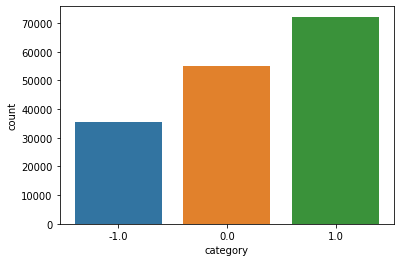

In [ ]:
sns.countplot(x = 'category', data = df)
plt.plot(   )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [70]:
df.dropna(inplace = True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [72]:
df.reset_index(inplace = True, drop = True)

In [73]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162964,why these 456 crores paid neerav modi not reco...,-1.0
162965,dear rss terrorist payal gawar what about modi...,-1.0
162966,did you cover her interaction forum where she ...,0.0
162967,there big project came into india modi dream p...,0.0


# LSTM Model


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pickle
import re
from nltk.tokenize  import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.utils import shuffle


from sklearn.model_selection import train_test_split

import tensorflow as tf

import keras
from keras.models import Sequential

from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers.core import Flatten
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy , CategoricalCrossentropy

from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [75]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_text'])
df['clean_text'] = tokenizer.texts_to_sequences(df['clean_text'])
df['clean_text']

0         [42, 1, 307, 42492, 66, 1726, 42493, 1119, 40,...
1         [286, 16, 2, 1104, 3, 718, 16, 2, 809, 7, 38, ...
2         [24, 53, 41, 99, 38, 4, 1, 1003, 21, 508, 5, 5...
3         [383, 19, 496, 4730, 113, 43, 1221, 1, 53, 126...
4         [390, 22, 813, 79, 2, 173, 926, 127, 136, 124,...
                                ...                        
162964    [32, 79, 5172, 474, 570, 2429, 1, 6, 2715, 17,...
162965    [305, 363, 529, 13161, 10149, 24, 36, 1, 1195,...
162966        [53, 5, 1718, 234, 2583, 7526, 118, 191, 397]
162967    [63, 183, 558, 360, 192, 9, 1, 924, 558, 15, 6...
162968    [14, 5, 260, 686, 36, 26, 35329, 118, 4882, 10...
Name: clean_text, Length: 162969, dtype: object

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'],df['category'], test_size=0.2, random_state=40)


In [77]:
X_train = pad_sequences( X_train, maxlen=100 ,dtype='float32')
X_test = pad_sequences( X_test, maxlen=100 ,dtype='float32')

In [78]:
len(tokenizer.index_word)


113678

In [79]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [89]:
len(X_test[0])

100

In [80]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [81]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)

In [90]:
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, input_length= 100 ,output_dim =100))
model.add(LSTM(100))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile("adam", loss= 'categorical_crossentropy' ,metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          11367900  
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_10 (Dense)            (None, 128)               12928     
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                                 
Total params: 11,461,615
Trainable params: 11,461,615
Non-trainable params: 0
_________________________________________________________________


In [91]:
history = model.fit(X_train , y_train ,batch_size=256, epochs=4, callbacks=[early_stop])

Epoch 1/4
510/510 [==============================] - ETA: 0s - loss: 0.3638 - accuracy: 0.8568

510/510 [==============================] - 296s 574ms/step - loss: 0.3638 - accuracy: 0.8568
Epoch 2/4
510/510 [==============================] - ETA: 0s - loss: 0.1087 - accuracy: 0.9676

510/510 [==============================] - 287s 563ms/step - loss: 0.1087 - accuracy: 0.9676
Epoch 3/4
510/510 [==============================] - ETA: 0s - loss: 0.0647 - accuracy: 0.9798

510/510 [==============================] - 283s 555ms/step - loss: 0.0647 - accuracy: 0.9798
Epoch 4/4
510/510 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9855

510/510 [==============================] - 284s 557ms/step - loss: 0.0445 - accuracy: 0.9855


In [92]:
results = model.evaluate(X_test, y_test, batch_size=64)


510/510 [==============================] - 22s 42ms/step - loss: 0.1309 - accuracy: 0.9641


In [93]:
pickle.dump(model, open('/content/drive/My Drive/DataSet/model_senti.pkl', 'wb'))

In [94]:
model = pickle.load(open('/content/drive/My Drive/DataSet/model_senti.pkl', 'rb'))

In [ ]:
model.predict()